In [ ]:
#import statements
!pip install folium
!pip install --upgrade osmnx
import folium
import pandas as pd
!pip install geopandas
!pip install contextily

import geopandas as gpd
import json
import requests

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.9/99.9 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 87.7 MB/s eta 0:00:00


In [ ]:
!pip uninstall osmnx -y
!pip install osmnx==1.3.0

Found existing installation: osmnx 2.0.2
Uninstalling osmnx-2.0.2:
  Successfully uninstalled osmnx-2.0.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 3.2 MB/s eta 0:00:00


In [ ]:
# Install dependencies as needed:
!pip install kagglehub[pandas-datasets]

In [ ]:
pip install pandas folium geopandas shapely


In [ ]:
# 📌 Step 1: Install necessary packages
!pip install folium geopandas shapely scikit-learn


In [ ]:
gdf = gpd.read_file("cctvdata1.geojson")
gdf.head()

import folium
m = folium.Map(location=[13.0827, 80.2707], zoom_start=12)

for _, row in gdf.iterrows():
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        popup=row.get('name', 'CCTV'),
        icon=folium.Icon(color='blue', icon='camera')
    ).add_to(m)

m  # This works in Jupyter/Colab


In [ ]:
import json
import requests

overpass_url = "http://overpass-api.de/api/interpreter"

# Bounding box: [south latitude, west longitude, north latitude, east longitude]
# Covers most of Chennai (including West Chennai suburbs)
query = """
[out:json][timeout:60];
(
  node["shop"](12.9,79.9,13.25,80.35);
  node["amenity"~"bank|atm|hospital|school|police|university|college|post_office|government"](12.9,79.9,13.25,80.35);
  node["building"~"commercial|retail|public"](12.9,79.9,13.25,80.35);
);
out body;
"""

response = requests.post(overpass_url, data={"data": query})

data = response.json()

with open("chennai_cctv_candidate_nodes.json", "w") as f:
    json.dump(data, f)

print("Downloaded and saved", len(data["elements"]), "nodes with expanded area!")


Downloaded and saved 4686 nodes with expanded area!


In [ ]:

with open("chennai_cctv_candidate_nodes.json") as f:
    data = json.load(f)

print("Sample node:", data["elements"][0])


Sample node: {'type': 'node', 'id': 247432808, 'lat': 12.9864437, 'lon': 79.9717629, 'tags': {'amenity': 'college', 'created_by': 'Potlatch 0.10f', 'name': 'Sri Venkateswara College of Engineering - SVCE'}}


<Axes: >

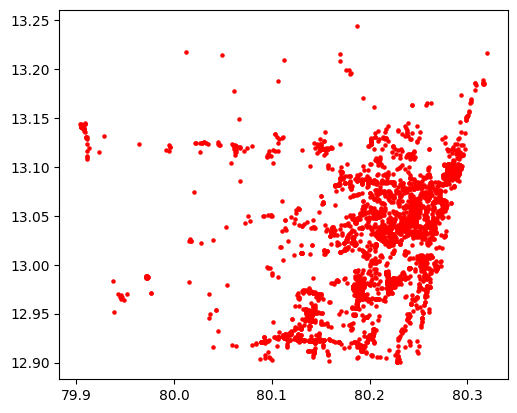

In [ ]:
import geopandas as gpd
import json
from shapely.geometry import Point

# Load JSON data
with open("chennai_cctv_candidate_nodes.json", "r") as f:
    data = json.load(f)

# Convert data to GeoDataFrame
points = [Point(element["lon"], element["lat"]) for element in data["elements"] if "lat" in element and "lon" in element]
gdf = gpd.GeoDataFrame(geometry=points)

# Plot with Geopandas
gdf.plot(marker="o", color="red", markersize=5)


In [ ]:
import requests
import json

# Overpass API URL
overpass_url = "http://overpass-api.de/api/interpreter"

# Query to fetch roads and walking routes
query = """
[out:json][timeout:60];
area["name"="Chennai"]->.searchArea;
(
  way["highway"](area.searchArea);
  way["highway"="footway"](area.searchArea);
  way["highway"="path"](area.searchArea);
);
out body;
"""

# Send the query to Overpass
response = requests.post(overpass_url, data={"data": query})

# Save the result in a JSON file
with open("chennai_roads_and_walkways.geojson", "w") as f:
    json.dump(response.json(), f)

print("Road and walking route data saved successfully.")


Road and walking route data saved successfully.


In [ ]:
# Overpass API query for CCTV cameras
query_cctv = """
[out:json][timeout:60];
area["name"="Chennai"]->.searchArea;
(
  node["man_made"="surveillance"](area.searchArea);
);
out body;
"""

# Send the query to Overpass
response_cctv = requests.post(overpass_url, data={"data": query_cctv})

# Save the result in a JSON file
with open("chennai_cctv_locations.geojson", "w") as f:
    json.dump(response_cctv.json(), f)

print("CCTV camera locations saved successfully.")


CCTV camera locations saved successfully.


In [ ]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt


In [ ]:
import geopandas as gpd
import json
from shapely.geometry import Point

# Load CCTV data
with open("chennai_cctv_locations.geojson", "r") as f:
    cctv_data = json.load(f)

# Step 1: Convert CCTV data to correct format
# Assuming CCTV data contains nodes or coordinates (lat, lon)
cctv_features = []
for element in cctv_data["elements"]:
    if element["type"] == "node" and "lat" in element and "lon" in element:
        # Create Point geometry for each CCTV location
        point = Point(element["lon"], element["lat"])
        cctv_features.append({
            "geometry": point,
            "id": element["id"],
            "name": element.get("tags", {}).get("name", "Unnamed")
        })

# Step 2: Create a GeoDataFrame from the CCTV features
cctv_gdf = gpd.GeoDataFrame(cctv_features, geometry="geometry", crs="EPSG:4326")

# Step 3: Save the cleaned CCTV data to a new GeoJSON file (for reuse)
cctv_gdf.to_file("cleaned_chennai_cctv_locations.geojson", driver="GeoJSON")

# Step 4: Check the first few rows to ensure correct format
print(cctv_gdf.head())


                    geometry          id                  name
0   POINT (80.24319 12.9813)  1454664555  Surveillance cameras
1  POINT (80.20604 13.10757)  6036660510   Surveillance Camera
2  POINT (80.19372 12.97758)  8310158932               Unnamed
3  POINT (80.22094 12.97538)  8337166347               Unnamed
4  POINT (80.24324 12.98134)  8432266502  Surveillance cameras


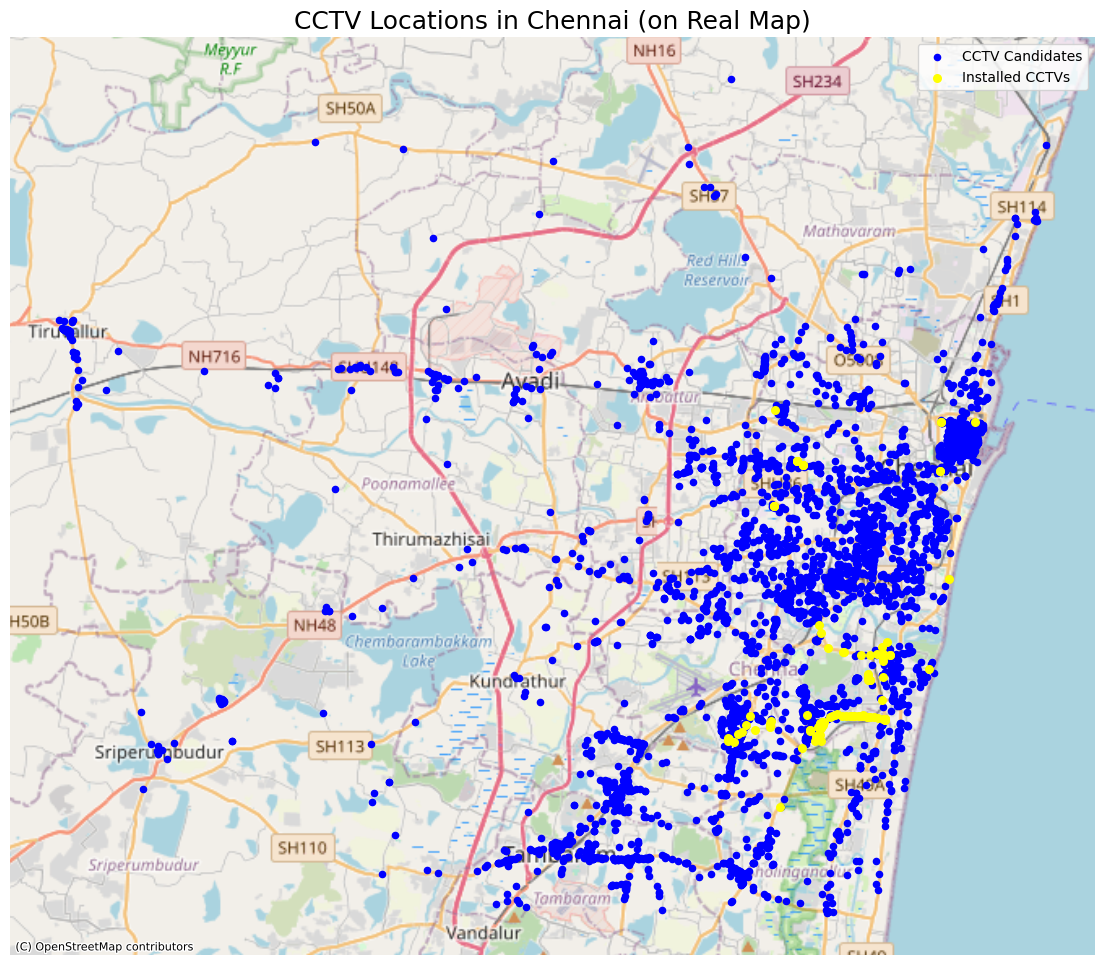

In [ ]:
import geopandas as gpd
import pandas as pd
import json
from shapely.geometry import Point
import matplotlib.pyplot as plt
import contextily as ctx  # New import for real map

# Step 1: Load the CCTV candidates manually
with open('chennai_cctv_candidate_nodes.json', 'r') as f:
    cctv_data = json.load(f)

# Step 2: Create list of Points
cctv_points = []
for node in cctv_data["elements"]:
    lat = node["lat"]
    lon = node["lon"]
    cctv_points.append(Point(lon, lat))  # lon, lat order

# Step 3: Create GeoDataFrame
cctv_candidates_gdf = gpd.GeoDataFrame(geometry=cctv_points, crs="EPSG:4326")

# Step 4: Load installed CCTV locations
cctv_locations_gdf = gpd.read_file("cleaned_chennai_cctv_locations.geojson")

# Step 5: Convert to Web Mercator for basemap (EPSG:3857)
cctv_candidates_gdf = cctv_candidates_gdf.to_crs(epsg=3857)
cctv_locations_gdf = cctv_locations_gdf.to_crs(epsg=3857)

# Step 6: Plot
fig, ax = plt.subplots(figsize=(14, 14))

cctv_candidates_gdf.plot(ax=ax, color='blue', markersize=20, label="CCTV Candidates")
cctv_locations_gdf.plot(ax=ax, color='yellow', markersize=30, label="Installed CCTVs")

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)  # Real background map
ax.set_title("CCTV Locations in Chennai (on Real Map)", fontsize=18)
ax.set_axis_off()
plt.legend()
plt.show()


In [ ]:
overpass_url = "http://overpass-api.de/api/interpreter"

# Bounding box [south, west, north, east]
query = """
[out:json][timeout:60];
way["highway"](12.9,79.9,13.25,80.35);
out body;
>;
out skel qt;
"""

response = requests.post(overpass_url, data={"data": query})
roads_data = response.json()

with open("chennai_roads.json", "w") as f:
    json.dump(roads_data, f)

print("Downloaded and saved", len(roads_data["elements"]), "road elements!")


Downloaded and saved 599494 road elements!


In [ ]:
import json
from shapely.geometry import Point, LineString
import geopandas as gpd

# Load road data
with open("chennai_roads.json", "r") as f:
    roads_data = json.load(f)

# Load camera data
with open("chennai_cctv_candidate_nodes.json", "r") as f:
    camera_data = json.load(f)

# Build a dictionary for quick lookup of nodes by their id
node_dict = {node["id"]: (node["lon"], node["lat"]) for node in roads_data["elements"] if node["type"] == "node"}

# Convert road data (ways) into geometries (LineString)
roads_lines = []
for element in roads_data["elements"]:
    if element["type"] == "way" and "highway" in element["tags"]:
        coords = []
        for node_id in element["nodes"]:
            if node_id in node_dict:
                coords.append(node_dict[node_id])  # Lookup node coordinates from dictionary
        if coords:
            line = LineString(coords)
            roads_lines.append(line)

# Convert camera nodes into Point objects
camera_points = []
for element in camera_data["elements"]:
    if element["type"] == "node" and "lat" in element and "lon" in element:
        camera_points.append(Point(element["lon"], element["lat"]))

# Convert to GeoDataFrames
roads_gdf = gpd.GeoDataFrame(geometry=roads_lines)
cameras_gdf = gpd.GeoDataFrame(geometry=camera_points)

# Project the coordinates to a projected CRS for accurate distance measurement (meters)
roads_gdf = roads_gdf.set_crs("EPSG:4326").to_crs("EPSG:3857")
cameras_gdf = cameras_gdf.set_crs("EPSG:4326").to_crs("EPSG:3857")


In [ ]:
# Buffer each camera by 100m to create a 100m radius around each camera
camera_buffers = cameras_gdf.geometry.buffer(100)

# Check if each road intersects with any of the camera buffers
green_roads = roads_gdf[roads_gdf.geometry.intersects(camera_buffers.union_all())]


In [ ]:
import json
import pandas as pd

# Load your raw CCTV JSON file
with open('chennai_cctv_candidate_nodes.json', 'r', encoding='utf-8') as f:
    raw_data = json.load(f)

# Process each node
clean_data = []

for node in raw_data['elements']:
    if node['type'] == 'node':
        node_id = node.get('id')
        lat = node.get('lat')
        lon = node.get('lon')
        tags = node.get('tags', {})

        location_type = tags.get('amenity', 'unknown')  # fallback to 'unknown'
        name = tags.get('name', 'unknown')

        clean_data.append({
            'id': node_id,
            'lat': lat,
            'lon': lon,
            'location_type': location_type,
            'name': name
        })

# Convert to DataFrame
df = pd.DataFrame(clean_data)

# Save cleaned data
df.to_csv('cctv_cleaned.csv', index=False)
print("✅ Cleaned data saved as 'cctv_cleaned.csv'")


✅ Cleaned data saved as 'cctv_cleaned.csv'


In [ ]:
import pandas as pd

# Load the cleaned CSV file
df = pd.read_csv('cctv_cleaned.csv')

# Display the first 5 rows
print(df.head())


          id        lat        lon location_type  \
0  247432808  12.986444  79.971763       college   
1  248420920  13.038649  80.205216      hospital   
2  248560797  13.122775  80.296058      hospital   
3  248643383  13.039146  80.257284           atm   
4  248643757  13.039407  80.257379   post_office   

                                             name  
0  Sri Venkateswara College of Engineering - SVCE  
1                     Kalaignar Karunanidhi Nagar  
2                                        Kasimedu  
3                                       HDFC Bank  
4                                        Alwarpet  


In [ ]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Load cleaned CCTV data
cctv_df = pd.read_csv('cctv_cleaned.csv')

# Create a base map centered around Chennai
m = folium.Map(location=[13.0827, 80.2707], zoom_start=11)

# Add marker cluster
marker_cluster = MarkerCluster().add_to(m)

# Add CCTV points
for idx, row in cctv_df.iterrows():
    folium.Marker(
        location=[row['lat'], row['lon']],
        popup=f"{row['name']} ({row['location_type']})"
    ).add_to(marker_cluster)

# Save map to HTML
m.save('cctv_map.html')
print("✅ CCTV map saved as 'cctv_map.html'")


✅ CCTV map saved as 'cctv_map.html'


# **SECTION** **2**

In [ ]:
!pip install --upgrade osmnx


Found existing installation: osmnx 2.0.2
Uninstalling osmnx-2.0.2:
  Successfully uninstalled osmnx-2.0.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 2.3 MB/s eta 0:00:00


In [ ]:
import osmnx as ox
import geopandas as gpd
import folium
import pandas as pd

# Step 1: Fetch police station points
place_name = "Chennai, Tamil Nadu, India"
tags = {'amenity': 'police'}

# Directly call
police_stations = ox.geometries_from_place(place_name, tags)

# Step 2: Keep only necessary columns
police_stations = police_stations[['name', 'geometry']].reset_index()

# Step 3: Display first 5 entries
print(police_stations.head())

# Step 4: Create folium map
m = folium.Map(location=[13.0827, 80.2707], zoom_start=12)

# Step 5: Plot points
for idx, row in police_stations.iterrows():
    if row.geometry.geom_type == 'Point':
        folium.Marker(
            location=[row.geometry.y, row.geometry.x],
            popup=row['name'] if pd.notna(row['name']) else "Unnamed Police Station",
            icon=folium.Icon(color='blue', icon='shield')
        ).add_to(m)

# Step 6: Show map
m

# step 7: Save as csv
police_stations.to_csv("chennai_police_stations.csv", index=False)


/usr/local/lib/python3.11/dist-packages/osmnx/geometries.py:228: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  polygon = gdf_place["geometry"].unary_union


  element_type      osmid                           name  \
0         node  250363729        Mambalam Police Station   
1         node  259773441                  Royapettah PS   
2         node  264481213                            NaN   
3         node  300468066  S-8 Adambakkam Police Station   
4         node  301949978                Teynampet E3 PS   

                    geometry  
0  POINT (80.22946 13.03496)  
1  POINT (80.26373 13.05201)  
2  POINT (80.24277 13.05962)  
3   POINT (80.20197 12.9894)  
4  POINT (80.24949 13.04865)  


<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()


In [ ]:
import osmnx as ox
print(ox.__version__)


1.3.0


In [ ]:
import pandas as pd

# Load the police stations CSV data
police_data = pd.read_csv("cctv_cleaned.csv")

# Display the first 5 rows of the dataset
print(police_data.head())


          id        lat        lon location_type  \
0  247432808  12.986444  79.971763       college   
1  248420920  13.038649  80.205216      hospital   
2  248560797  13.122775  80.296058      hospital   
3  248643383  13.039146  80.257284           atm   
4  248643757  13.039407  80.257379   post_office   

                                             name  
0  Sri Venkateswara College of Engineering - SVCE  
1                     Kalaignar Karunanidhi Nagar  
2                                        Kasimedu  
3                                       HDFC Bank  
4                                        Alwarpet  


In [ ]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
from shapely.geometry import Point  # Import Point from shapely.geometry

# Load the police station data (replace this with the actual CSV file path if needed)
police_data = pd.read_csv("chennai_police_stations.csv")

# Check the first few rows of the data to ensure it's loaded properly
print(police_data.head())

# Convert the 'geometry' column from WKT (Well Known Text) to shapely geometry (Point)
# Ensure that non-Point geometries are handled properly
police_data['geometry'] = police_data['geometry'].apply(lambda x: wkt.loads(x) if isinstance(x, str) else None)

# Now convert the data into a GeoDataFrame
gdf_police = gpd.GeoDataFrame(police_data, geometry='geometry', crs="EPSG:4326")

# Filter out rows where geometry is not a valid Point
gdf_police = gdf_police[gdf_police.geometry.apply(lambda geom: isinstance(geom, Point))]

# Now we can safely extract lat and lon from Point geometries
gdf_police['lat'] = gdf_police.geometry.apply(lambda geom: geom.y if isinstance(geom, Point) else None)
gdf_police['lon'] = gdf_police.geometry.apply(lambda geom: geom.x if isinstance(geom, Point) else None)

# Drop rows where lat or lon are missing (invalid data)
gdf_police_cleaned = gdf_police[['osmid', 'name', 'lat', 'lon']].dropna(subset=['lat', 'lon'])

# Display the cleaned data to verify
print(gdf_police_cleaned.head())

# Save the cleaned police data to a new CSV file (optional)
gdf_police_cleaned.to_csv("chennai_police_stations_cleaned.csv", index=False)


  element_type      osmid                           name  \
0         node  250363729        Mambalam Police Station   
1         node  259773441                  Royapettah PS   
2         node  264481213                            NaN   
3         node  300468066  S-8 Adambakkam Police Station   
4         node  301949978                Teynampet E3 PS   

                        geometry  
0    POINT (80.22946 13.0349573)  
1  POINT (80.2637348 13.0520106)  
2  POINT (80.2427681 13.0596173)  
3  POINT (80.2019683 12.9893957)  
4   POINT (80.2494881 13.048651)  
       osmid                           name        lat        lon
0  250363729        Mambalam Police Station  13.034957  80.229460
1  259773441                  Royapettah PS  13.052011  80.263735
2  264481213                            NaN  13.059617  80.242768
3  300468066  S-8 Adambakkam Police Station  12.989396  80.201968
4  301949978                Teynampet E3 PS  13.048651  80.249488


In [ ]:
import pandas as pd

# Load your cleaned CCTV data (assuming it's in 'cctv_cleaned.csv')
cctv_data = pd.read_csv('cctv_cleaned.csv')

# Load your cleaned Police Station data (assuming it's in 'police_stations_cleaned.csv')
police_data = pd.read_csv('chennai_police_stations_cleaned.csv')

# Display the first 5 rows of both datasets to verify compatibility
print("First 5 rows of CCTV Data:")
print(cctv_data.head())

print("\nFirst 5 rows of Police Station Data:")
print(police_data.head())


First 5 rows of CCTV Data:
          id        lat        lon location_type  \
0  247432808  12.986444  79.971763       college   
1  248420920  13.038649  80.205216      hospital   
2  248560797  13.122775  80.296058      hospital   
3  248643383  13.039146  80.257284           atm   
4  248643757  13.039407  80.257379   post_office   

                                             name  
0  Sri Venkateswara College of Engineering - SVCE  
1                     Kalaignar Karunanidhi Nagar  
2                                        Kasimedu  
3                                       HDFC Bank  
4                                        Alwarpet  

First 5 rows of Police Station Data:
       osmid                           name        lat        lon
0  250363729        Mambalam Police Station  13.034957  80.229460
1  259773441                  Royapettah PS  13.052011  80.263735
2  264481213                            NaN  13.059617  80.242768
3  300468066  S-8 Adambakkam Police Station  1

In [ ]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Load cleaned Police Station data
police_df = pd.read_csv('chennai_police_stations_cleaned.csv')

# Create a base map centered around Chennai
m = folium.Map(location=[13.0827, 80.2707], zoom_start=11)

# Add marker cluster
marker_cluster = MarkerCluster().add_to(m)

# Add Police Station points
for idx, row in police_df.iterrows():
    folium.Marker(
        location=[row['lat'], row['lon']],
        popup=f"{row['name'] if pd.notna(row['name']) else 'Unnamed Police Station'}"
    ).add_to(marker_cluster)

# Save map to HTML
m.save('police_stations_map.html')
print("✅ Police station map saved as 'police_stations_map.html'")


✅ Police station map saved as 'police_stations_map.html'


# SECTION 3


In [ ]:
import pandas as pd

df = pd.read_csv("crimes_against_women.csv")
print(df.head())


   Unnamed: 0        STATE/UT       DISTRICT  Year  Rape  \
0           0  ANDHRA PRADESH       ADILABAD  2001    50   
1           1  ANDHRA PRADESH      ANANTAPUR  2001    23   
2           2  ANDHRA PRADESH       CHITTOOR  2001    27   
3           3  ANDHRA PRADESH       CUDDAPAH  2001    20   
4           4  ANDHRA PRADESH  EAST GODAVARI  2001    23   

   Kidnapping and Abduction  Dowry Deaths  \
0                        30            16   
1                        30             7   
2                        34            14   
3                        20            17   
4                        26            12   

   Assault on women with intent to outrage her modesty  \
0                                                149     
1                                                118     
2                                                112     
3                                                126     
4                                                109     

   Insult to modest

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('crimes_against_women.csv')

# Filter only for CHENNAI district
chennai_df = df[df['DISTRICT'].str.upper() == 'CHENNAI']

# Save the filtered data to a new CSV
chennai_df.to_csv('chennai_crime_data.csv', index=False)

print("✅ Chennai crime data saved as 'chennai_crime_data.csv'")
print("First 5 rows:")
print(chennai_df.head())


✅ Chennai crime data saved as 'chennai_crime_data.csv'
First 5 rows:
      Unnamed: 0    STATE/UT DISTRICT  Year  Rape  Kidnapping and Abduction  \
537          537  TAMIL NADU  CHENNAI  2001    28                         0   
1253        1253  TAMIL NADU  CHENNAI  2002    26                        21   
1982        1982  TAMIL NADU  CHENNAI  2003    38                         0   
2710        2710  TAMIL NADU  CHENNAI  2004    30                        20   
3443        3443  TAMIL NADU  CHENNAI  2005    43                        31   

      Dowry Deaths  Assault on women with intent to outrage her modesty  \
537             13                                                 70     
1253            20                                                 61     
1982            18                                                 90     
2710            23                                                 55     
3443            30                                                 82     

     

In [ ]:
import pandas as pd
import folium
from folium import Choropleth
from folium.plugins import MarkerCluster
from shapely.geometry import Polygon
import geopandas as gpd
from shapely.geometry import Point

# Load crime data
df = pd.read_csv('final_official_crime_data.csv')

# Create GeoDataFrame with area center points
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.Longitude, df.Latitude),
    crs="EPSG:4326"
)

# Approximate area zones using buffer (e.g., 1 km radius)
gdf['geometry'] = gdf.geometry.buffer(0.01)  # 0.01 degrees ≈ 1 km

# Create a Folium map centered at Chennai
m = folium.Map(location=[13.0827, 80.2707], zoom_start=11, tiles='cartodbpositron')

# Normalize crimes_per_1000 to [0,1] for color scale
min_val = df['Crimes_per_1000'].min()
max_val = df['Crimes_per_1000'].max()

# Add each region with color scaled by crimes_per_1000
for _, row in gdf.iterrows():
    val = row['Crimes_per_1000']
    norm_val = (val - min_val) / (max_val - min_val)
    color = f'#{int(255):02x}{int((1 - norm_val) * 200):02x}{int((1 - norm_val) * 200):02x}'  # light → dark red

    folium.GeoJson(
        row['geometry'].__geo_interface__,
        style_function=lambda feature, color=color: {
            'fillColor': color,
            'color': 'black',
            'weight': 0.3,
            'fillOpacity': 0.6
        },
        tooltip=f"{row['Area']}<br>Crimes/1000: {val:.2f}"
    ).add_to(m)

# Optional: Add markers at center
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=2,
        fill=True,
        color='black',
        fill_opacity=0.6,
        popup=f"{row['Area']}<br>Crimes/1000: {row['Crimes_per_1000']:.2f}"
    ).add_to(m)

# Save map
m.save('chennai_crime_heatmap.html')
print("✅ Crime intensity map saved as 'chennai_crime_heatmap.html'")


✅ Crime intensity map saved as 'chennai_crime_heatmap.html'


<ipython-input-21-d9c91b76a671>:20: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['geometry'] = gdf.geometry.buffer(0.01)  # 0.01 degrees ≈ 1 km


In [ ]:
import pandas as pd

df = pd.read_csv("final_official_crime_data.csv")
print(df.head())


          Area  Latitude  Longitude  Population  Crime_Count  Crimes_per_1000
0     Tambaram   12.9249    80.1000      960000           63             0.07
1     T. Nagar   13.0418    80.2335      300000           44             0.15
2   Anna Nagar   13.0878    80.2102      310000           26             0.08
3   Royapettah   13.0551    80.2616      175000           13             0.07
4  Choolaimedu   13.0634    80.2274      265000           32             0.12


In [ ]:
# # ✅ Step 1: Install folium
# !pip install folium

# ✅ Step 2: Import Libraries
import pandas as pd
import numpy as np
import folium
from sklearn.neighbors import KNeighborsRegressor
from matplotlib import cm

# ✅ Step 3: Load your crime data
df = pd.read_csv('final_official_crime_data.csv')

# ✅ Step 4: Train KNN on Latitude/Longitude
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(df[['Latitude', 'Longitude']], df['Crimes_per_1000'])

# ✅ Step 5: Create a grid covering Chennai
min_lat, max_lat = 12.82, 13.20
min_lon, max_lon = 80.00, 80.33
grid_size = 0.01  # Smaller = more detailed

grid_points = []
for lat in np.arange(min_lat, max_lat, grid_size):
    for lon in np.arange(min_lon, max_lon, grid_size):
        grid_points.append((lat, lon))

grid_df = pd.DataFrame(grid_points, columns=['Latitude', 'Longitude'])

# ✅ Step 6: Predict crime intensity
grid_df['Crimes_per_1000'] = knn.predict(grid_df[['Latitude', 'Longitude']])

# ✅ Step 7: Normalize for color mapping
cmap = cm.get_cmap('Reds')
min_val = grid_df['Crimes_per_1000'].min()
max_val = grid_df['Crimes_per_1000'].max()

def crime_to_color(value):
    norm_val = (value - min_val) / (max_val - min_val)
    r, g, b, _ = cmap(norm_val)
    return f'#{int(r*255):02x}{int(g*255):02x}{int(b*255):02x}'

# ✅ Step 8: Create the folium map with better background visibility
m = folium.Map(location=[13.05, 80.25], zoom_start=11, tiles='OpenStreetMap')  # or 'Stamen TonerLite'

for _, row in grid_df.iterrows():
    lat, lon = row['Latitude'], row['Longitude']
    square = [
        [lat, lon],
        [lat + grid_size, lon],
        [lat + grid_size, lon + grid_size],
        [lat, lon + grid_size]
    ]
    color = crime_to_color(row['Crimes_per_1000'])
    folium.Polygon(
        locations=square,
        color=None,
        fill=True,
        fill_color=color,
        fill_opacity=0.4,  # reduced from 0.7 for better map visibility
        weight=0
    ).add_to(m)

# ✅ Step 9: Save map
m.save('crime_heatmap_chennai.html')
print("✅ Updated crime heatmap saved as 'crime_heatmap_chennai.html'")


<ipython-input-32-26a5789d0f46>:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Reds')


✅ Updated crime heatmap saved as 'crime_heatmap_chennai.html'


# SECTION 4

In [ ]:
# # ✅ Step 1: Install folium
# !pip install folium

# ✅ Step 2: Import Libraries
import pandas as pd
import numpy as np
import folium
from sklearn.neighbors import KNeighborsRegressor
from matplotlib import cm

# ✅ Step 3: Load your crime data
df = pd.read_csv('unofficial_crime_data.csv')

# ✅ Step 4: Train KNN on Latitude/Longitude
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(df[['Latitude', 'Longitude']], df['Crimes_per_1000'])

# ✅ Step 5: Create a grid covering Chennai
min_lat, max_lat = 12.82, 13.20
min_lon, max_lon = 80.00, 80.33
grid_size = 0.01  # Smaller = more detailed

grid_points = []
for lat in np.arange(min_lat, max_lat, grid_size):
    for lon in np.arange(min_lon, max_lon, grid_size):
        grid_points.append((lat, lon))

grid_df = pd.DataFrame(grid_points, columns=['Latitude', 'Longitude'])

# ✅ Step 6: Predict crime intensity
grid_df['Crimes_per_1000'] = knn.predict(grid_df[['Latitude', 'Longitude']])

# ✅ Step 7: Normalize for color mapping
cmap = cm.get_cmap('Reds')
min_val = grid_df['Crimes_per_1000'].min()
max_val = grid_df['Crimes_per_1000'].max()

def crime_to_color(value):
    norm_val = (value - min_val) / (max_val - min_val)
    r, g, b, _ = cmap(norm_val)
    return f'#{int(r*255):02x}{int(g*255):02x}{int(b*255):02x}'

# ✅ Step 8: Create the folium map with better background visibility
m = folium.Map(location=[13.05, 80.25], zoom_start=11, tiles='OpenStreetMap')  # or 'Stamen TonerLite'

for _, row in grid_df.iterrows():
    lat, lon = row['Latitude'], row['Longitude']
    square = [
        [lat, lon],
        [lat + grid_size, lon],
        [lat + grid_size, lon + grid_size],
        [lat, lon + grid_size]
    ]
    color = crime_to_color(row['Crimes_per_1000'])
    folium.Polygon(
        locations=square,
        color=None,
        fill=True,
        fill_color=color,
        fill_opacity=0.4,  # reduced from 0.7 for better map visibility
        weight=0
    ).add_to(m)

# ✅ Step 9: Save map
m.save('unofficial_crime_heatmap.html')
print("✅ Updated crime heatmap saved as 'crime_heatmap_chennai.html'")


<ipython-input-5-1d89e267f698>:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Reds')


✅ Updated crime heatmap saved as 'crime_heatmap_chennai.html'


# SECTION 5

In [ ]:
import osmnx as ox
import geopandas as gpd
import pandas as pd

place_name = "Chennai, Tamil Nadu, India"

# ✅ Define tags for each type
tags = {
    'bus_stop': {'highway': 'bus_stop'},
    'bus_station': {'amenity': 'bus_station'},
    'metro_station': {'railway': 'station', 'station': 'subway'}
}

# ✅ Fetch & process function
def fetch_locations(tag_dict, label):
    gdf = ox.geometries_from_place(place_name, tag_dict)
    gdf = gdf[gdf.geometry.geom_type == 'Point']  # Filter only Points
    gdf = gdf[['name', 'geometry']].reset_index()
    gdf['Type'] = label
    gdf['Latitude'] = gdf.geometry.y
    gdf['Longitude'] = gdf.geometry.x
    return gdf[['name', 'Latitude', 'Longitude', 'Type']]

# ✅ Fetch each
bus_stops_df = fetch_locations(tags['bus_stop'], 'Bus Stop')
bus_stations_df = fetch_locations(tags['bus_station'], 'Bus Station')
metro_stations_df = fetch_locations(tags['metro_station'], 'Metro Station')

# ✅ Combine and save
transport_df = pd.concat([bus_stops_df, bus_stations_df, metro_stations_df], ignore_index=True)
transport_df.rename(columns={'name': 'Name'}, inplace=True)
transport_df.to_csv("chennai_transport_locations.csv", index=False)

print("✅ Saved transport data as 'chennai_transport_locations.csv'")


/usr/local/lib/python3.11/dist-packages/osmnx/geometries.py:228: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  polygon = gdf_place["geometry"].unary_union
/usr/local/lib/python3.11/dist-packages/osmnx/geometries.py:228: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  polygon = gdf_place["geometry"].unary_union


✅ Saved transport data as 'chennai_transport_locations.csv'


<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()


In [ ]:
import pandas as pd

df = pd.read_csv("chennai_transport_locations.csv")
print(df.head())


                              Name   Latitude  Longitude      Type
0  Thiruvanmiyur Moffusil bus stop  12.987301  80.259419  Bus Stop
1                    Sathya Studio  13.014809  80.259350  Bus Stop
2                           Guindy  13.008075  80.209390  Bus Stop
3                              NaN  13.050564  80.279698  Bus Stop
4                IIT Gate Bus Stop  13.005846  80.242464  Bus Stop


<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()


In [ ]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Load cleaned Police Station data
police_df = pd.read_csv('chennai_transport_locations.csv')

# Create a base map centered around Chennai
m = folium.Map(location=[13.0827, 80.2707], zoom_start=11)

# Add marker cluster
marker_cluster = MarkerCluster().add_to(m)

# Add Police Station points
for idx, row in police_df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Name'] if pd.notna(row['Name']) else 'Unnamed Bus station'}"
    ).add_to(marker_cluster)

# Save map to HTML
m.save('transport_map.html')
print("✅ Transport map saved as 'transport_map.html'")


✅ Transport map saved as 'transport_map.html'


In [ ]:
# Define Chennai bounding box
min_lat, max_lat = 12.82, 13.20
min_lon, max_lon = 80.00, 80.33
grid_size = 0.01  # roughly ~1.1 km² per grid

# Generate grid cells
import numpy as np
grid_points = []
for lat in np.arange(min_lat, max_lat, grid_size):
    for lon in np.arange(min_lon, max_lon, grid_size):
        grid_points.append({'Latitude': lat, 'Longitude': lon})

grid_df = pd.DataFrame(grid_points)



NameError: name 'pd' is not defined